In [1]:
from sklearn.datasets import make_regression  # make_xxx 创建各种数据集
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression  # 线性回归，求解析解
from sklearn.linear_model import SGDRegressor    # 线性回归， 随机梯度下降法
from sklearn.metrics import mean_squared_error  # MSE:平均平方误差
from sklearn.preprocessing import StandardScaler,MinMaxScaler

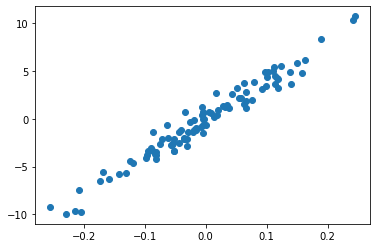

In [2]:
%matplotlib inline
X, y = make_regression(
                    n_features=1,  # 一元线性回归
                    n_samples=100,  # 样本数量
                    effective_rank=1,
                    noise=1,
                    random_state=4
) 
plt.scatter(X,y)

LR训练集集评分： 0.9604016558710454
LR测试集评分： 0.9492531259636049
LR均方误差： 0.8913960242664517
LR模型斜率w:  [39.47310021]
LR模型截距b:  -0.03685990847751375
LR模型：y=39.473100214285886x+(-0.03685990847751375)


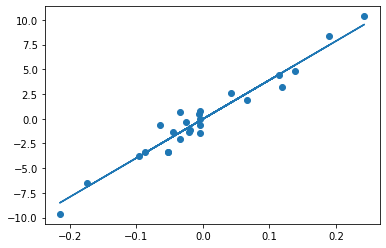

In [3]:
# 划分数据集
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=100)
# 创建回归器模型
lr = LinearRegression()
# 训练
lr.fit(X_train,y_train)
# 预测
y_pred = lr.predict(X_test)
# 评分
print("LR训练集集评分：", lr.score(X_train,y_train))
print("LR测试集评分：", lr.score(X_test,y_test))
print("LR均方误差：",mean_squared_error(y_test,y_pred))
print("LR模型斜率w: ", lr.coef_)
print("LR模型截距b: ", lr.intercept_)
print(f"LR模型：y={lr.coef_[0]}x+({lr.intercept_})")

#%matplotlib inline
plt.scatter(X_test,y_test)
plt.plot(X_test,y_pred)


SGD训练集集评分： 0.7805176617454386
SGD测试集评分： 0.760324112193241
SGD均方误差： 4.210035348192131
SGD模型斜率w:  [22.38983046]
SGD模型截距b:  [-0.11367229]
SGD模型：y=22.389830463376136x+([-0.11367229])


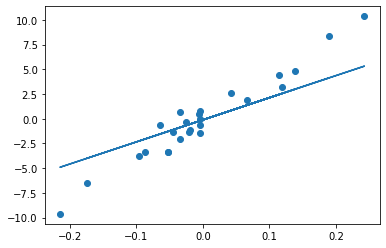

In [4]:

# 划分数据集
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=100)
# 归一化
# scalar = MinMaxScaler()
# X_train = scalar.fit_transform(X_train)
# X_test = scalar.transform(X_test)
# 创建回归器模型
lr = SGDRegressor(max_iter=20000,alpha=0.001)
# 训练
lr.fit(X_train,y_train)
# 预测
y_pred = lr.predict(X_test)
# 评分
print("SGD训练集集评分：", lr.score(X_train,y_train))
print("SGD测试集评分：", lr.score(X_test,y_test))
print("SGD均方误差：",mean_squared_error(y_test,y_pred))
print("SGD模型斜率w: ", lr.coef_)
print("SGD模型截距b: ", lr.intercept_)
print(f"SGD模型：y={lr.coef_[0]}x+({lr.intercept_})")

#%matplotlib inline
plt.scatter(X_test,y_test)
plt.plot(X_test,y_pred)


SGD训练集集评分： 0.9171302762062898
SGD测试集评分： 0.8993501844806773
SGD均方误差： 1.7679679211911767
SGD模型斜率w:  [15.52261457]
SGD模型截距b:  [-7.92734821]
SGD模型：y=15.522614569807105x+([-7.92734821])


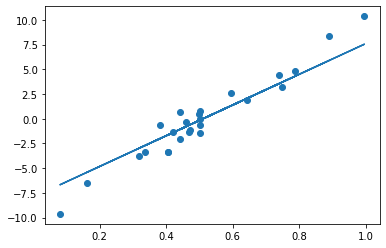

In [5]:

# 划分数据集
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=100)
# 归一化
scalar = MinMaxScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)
# 创建回归器模型
lr = SGDRegressor(max_iter=20000,alpha=0.001)
# 训练
lr.fit(X_train,y_train)
# 预测
y_pred = lr.predict(X_test)
# 评分
print("SGD训练集集评分：", lr.score(X_train,y_train))
print("SGD测试集评分：", lr.score(X_test,y_test))
print("SGD均方误差：",mean_squared_error(y_test,y_pred))
print("SGD模型斜率w: ", lr.coef_)
print("SGD模型截距b: ", lr.intercept_)
print(f"SGD模型：y={lr.coef_[0]}x+({lr.intercept_})")

#%matplotlib inline
plt.scatter(X_test,y_test)
plt.plot(X_test,y_pred)


LR系数: [ 3.89582277 32.29879542]
LR截距: -20.322053339808082
LR训练集得分: 0.9941393685150305
LR测试集得分: 0.992719988041538
LR测试集均方误差: 0.27166186404910475


<IPython.core.display.Javascript object>


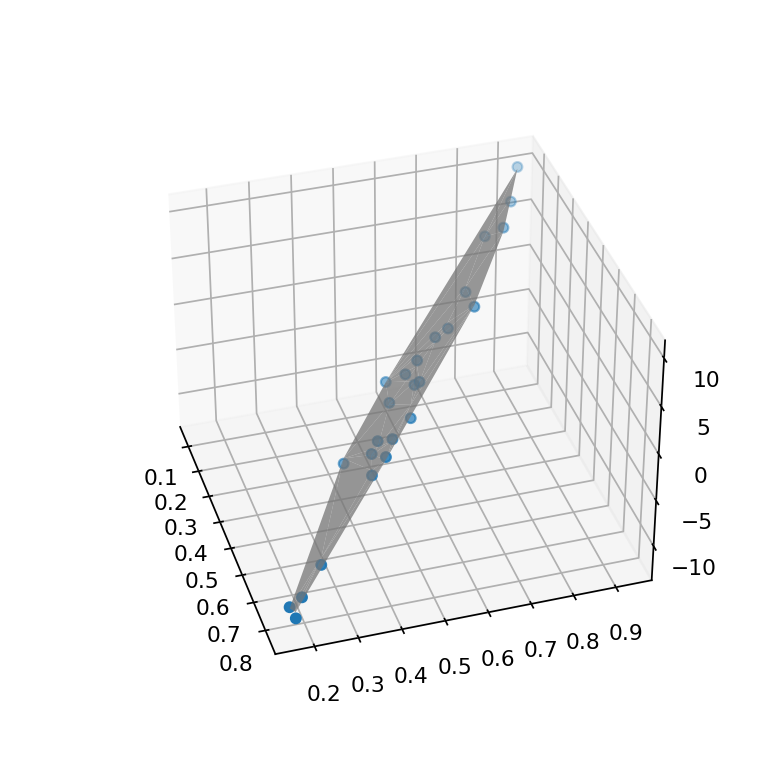

In [8]:
from sklearn.linear_model import LinearRegression,SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_regression  # make_xxx 创建各种数据集
import matplotlib.pyplot as plt

lr = LinearRegression()

X, y = make_regression(n_features=2,effective_rank=0.1,tail_strength=0.2,noise=0.5)
X_train,X_test,y_train,y_test = train_test_split(X,y)

# 归一化
scalar = MinMaxScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

lr.fit(X_train,y_train)

print("LR系数:",lr.coef_)
print("LR截距:",lr.intercept_)
print("LR训练集得分:",lr.score(X_train,y_train))
print("LR测试集得分:",lr.score(X_test,y_test))
y_pred = lr.predict(X_test)
print("LR测试集均方误差:",mean_squared_error(y_test,y_pred))

%matplotlib notebook
#导入三维工具包mplot3d
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(5,5))
#创建3d绘图区域
ax = plt.axes(projection='3d',)

ax.scatter3D(X_test[:, 0],X_test[:, 1],y_test)
ax.plot_trisurf(X_test[:, 0],X_test[:, 1],y_pred,color="grey",alpha=0.75)
plt.show()

SGD系数: [9.71909715 6.6213391 ]
SGD截距: [-8.84504583]
SGD训练集得分: 0.9160192689678446
SGD测试集得分: 0.9289551970463059
SGD测试集均方误差: 1.1656157913929932


<IPython.core.display.Javascript object>


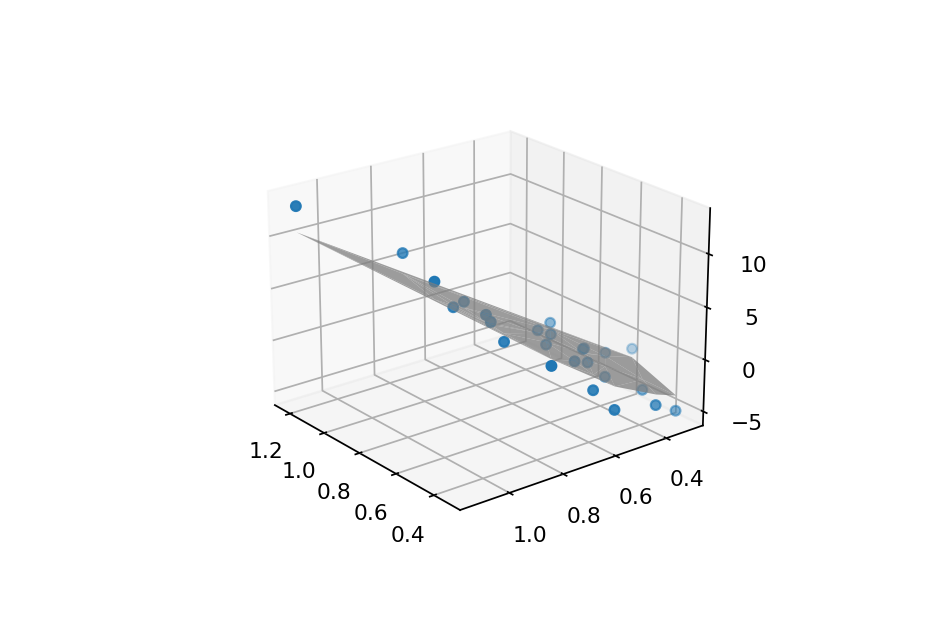

In [9]:
from sklearn.linear_model import LinearRegression,SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

lr = SGDRegressor()

X, y = make_regression(n_features=2,effective_rank=0.1,tail_strength=0.2,noise=0.5)
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=100)

# 归一化
scalar = MinMaxScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

lr.fit(X_train,y_train)

print("SGD系数:",lr.coef_)
print("SGD截距:",lr.intercept_)
print("SGD训练集得分:",lr.score(X_train,y_train))
print("SGD测试集得分:",lr.score(X_test,y_test))
y_pred = lr.predict(X_test)
print("SGD测试集均方误差:",mean_squared_error(y_test,y_pred))


#导入三维工具包mplot3d
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(6,4))
#创建3d绘图区域
ax = plt.axes(projection='3d',)

ax.scatter3D(X_test[:, 0],X_test[:, 1],y_test)
ax.plot_trisurf(X_test[:, 0],X_test[:, 1],y_pred,color="grey",alpha=0.75)
plt.show()

### 多项式回归，升维

In [3]:
import numpy as np
x1 = np.array([[1],[2],[3],[4]])
x1
x2 = np.array([[5],[6],[7],[8]])
x = np.concatenate([x1,x2],axis=1)
x

array([[1, 5],
       [2, 6],
       [3, 7],
       [4, 8]])

In [4]:
from sklearn.preprocessing import PolynomialFeatures  # 多项式特征构造器
pf = PolynomialFeatures(degree=2,include_bias=False) # 2阶多项式
pf.fit_transform(x)

array([[ 1.,  5.,  1.,  5., 25.],
       [ 2.,  6.,  4., 12., 36.],
       [ 3.,  7.,  9., 21., 49.],
       [ 4.,  8., 16., 32., 64.]])

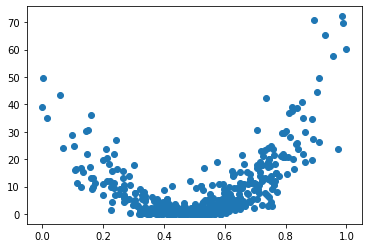

In [3]:
%matplotlib inline
from sklearn.preprocessing import PolynomialFeatures  # 多项式特征构造器
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

X, y = make_regression(
                    n_features=1,  # 一元线性回归
                    n_samples=500,  # 样本数量
                    effective_rank=1,
                    noise=1,
                    random_state=4
) 
scalar = MinMaxScaler()
X = scalar.fit_transform(X)
# y = w * x
z = y**2 + y*2 + 1
plt.scatter(X,z)


X_train,X_test,y_train,y_test = train_test_split(X,z,test_size=0.1,random_state=100)


LR训练集得分： 0.09816911390800676
LR测试集得分： -0.04681410326275559
SGD训练集得分： 0.09696355263571188
SGD测试集得分： -0.049952355858634334


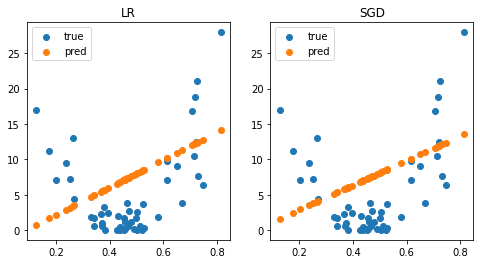

In [4]:
from sklearn.linear_model import LinearRegression,SGDRegressor



models = [("LR",LinearRegression()),("SGD",SGDRegressor())]

fig,axes = plt.subplots(1,2,figsize=(8,4))

for idx,(model_name,model) in enumerate(models):
    model.fit(X_train,y_train)
    print(f"{model_name}训练集得分：",model.score(X_train,y_train))
    print(f"{model_name}测试集得分：",model.score(X_test,y_test))
    y_pred = model.predict(X_test)
    axes[idx].scatter(X_test,y_test,label="true") # 真实值
    axes[idx].scatter(X_test,y_pred,label="pred") # 预测值
    axes[idx].legend()
    axes[idx].set_title(model_name)



LR训练集得分： 0.7674836661208003
LR测试集得分： 0.7272498340015827
SGD训练集得分： 0.6909960151898464
SGD测试集得分： 0.7228994519417511


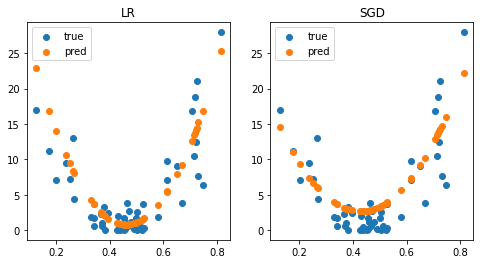

In [5]:
X_train,X_test,y_train,y_test = train_test_split(X,z,test_size=0.1,random_state=100)

pf = PolynomialFeatures(degree=2)
X_train_pf = pf.fit_transform(X_train)
X_test_pf = pf.transform(X_test)

models = [("LR",LinearRegression()),("SGD",SGDRegressor(max_iter=20000))]

fig,axes = plt.subplots(1,2,figsize=(8,4))

for idx,(model_name,model) in enumerate(models):
    model.fit(X_train_pf,y_train)
    print(f"{model_name}训练集得分：",model.score(X_train_pf,y_train))
    print(f"{model_name}测试集得分：",model.score(X_test_pf,y_test))
    y_pred = model.predict(X_test_pf)
    axes[idx].scatter(X_test,y_test,label="true") # 真实值
    axes[idx].scatter(X_test,y_pred,label="pred") # 预测值
    axes[idx].legend()
    axes[idx].set_title(model_name)



训练集得分（2阶）： 0.771682025437004
测试集得分（2阶）： 0.736682640994527
------------------------------
训练集得分（3阶）： 0.7728159025664448
测试集得分（3阶）： 0.7435616612655218
------------------------------
训练集得分（4阶）： 0.7749003823020781
测试集得分（4阶）： 0.7378098148906347
------------------------------
训练集得分（5阶）： 0.7753015135097933
测试集得分（5阶）： 0.7328646001166608
------------------------------
训练集得分（6阶）： 0.776686263081757
测试集得分（6阶）： 0.7196689086932364
------------------------------
训练集得分（7阶）： 0.7770208106745258
测试集得分（7阶）： 0.7246980820923565
------------------------------
训练集得分（8阶）： 0.7774496637815158
测试集得分（8阶）： 0.7243719339629853
------------------------------


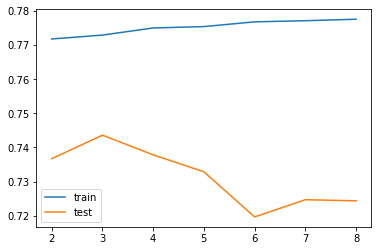

In [6]:
X_train,X_test,y_train,y_test = train_test_split(X,z,test_size=0.1,random_state=5)
train_scores = []
test_scores = []
degrees = range(2,9)

sgd = SGDRegressor(max_iter=10000,alpha=0.001)
lr = LinearRegression()

for i in degrees:
    pf = PolynomialFeatures(degree=i)
    X_train_pf = pf.fit_transform(X_train)
    X_test_pf = pf.fit_transform(X_test)
    lr.fit(X_train_pf,y_train)
    train_score = lr.score(X_train_pf,y_train)
    test_score = lr.score(X_test_pf,y_test)
    train_scores.append(max(train_score,0))
    test_scores.append(max(test_score,0))
    print(f"训练集得分（{i}阶）：",train_score)
    print(f"测试集得分（{i}阶）：",test_score)
    print("-"*30)

plt.plot(degrees,train_scores,label='train')
plt.plot(degrees,test_scores,label='test')
plt.xticks(degrees)
plt.legend()

In [7]:
import warnings
warnings.filterwarnings("ignore")

from sklearn.datasets import load_boston
boston = load_boston()
X = boston.data
y = boston.target

scalar = MinMaxScaler()
X = scalar.fit_transform(X)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=10)

models = [("LR",LinearRegression()),("SGD",SGDRegressor(max_iter=10000))]

for model_name,model in models:
    model.fit(X_train,y_train)
    print(f"{model_name}训练集得分：",round(model.score(X_train,y_train),2)*100)
    print(f"{model_name}测试集得分：",round(model.score(X_test,y_test),2)*100)




LR训练集得分： 75.0
LR测试集得分： 67.0
SGD训练集得分： 73.0
SGD测试集得分： 66.0


In [1]:
import warnings
warnings.filterwarnings("ignore")

from sklearn.datasets import load_boston
boston = load_boston()
X = boston.data
y = boston.target
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

LR训练集得分2阶： 93.0
LR测试集得分2阶： 87.0
LR训练集得分3阶： 100.0
LR测试集得分3阶： -27039.999999999996
LR训练集得分4阶： 100.0
LR测试集得分4阶： -774.0
LR训练集得分5阶： 100.0
LR测试集得分5阶： -376.0
LR训练集得分6阶： 100.0
LR测试集得分6阶： -236.0
LR训练集得分7阶： 100.0
LR测试集得分7阶： -178.0
LR训练集得分8阶： 100.0
LR测试集得分8阶： -147.0
SGD训练集得分2阶： 79.0
SGD测试集得分2阶： 74.0
SGD训练集得分3阶： 82.0
SGD测试集得分3阶： 78.0
SGD训练集得分4阶： 85.0
SGD测试集得分4阶： 82.0
SGD训练集得分5阶： 87.0
SGD测试集得分5阶： 83.0
SGD训练集得分6阶： 88.0
SGD测试集得分6阶： 83.0
SGD训练集得分7阶： -1850311255.9999998
SGD测试集得分7阶： -756862077.0
SGD训练集得分8阶： -1.411642366196968e+22
SGD测试集得分8阶： -6.171826597099447e+21


([<matplotlib.axis.XTick at 0x206324d9550>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

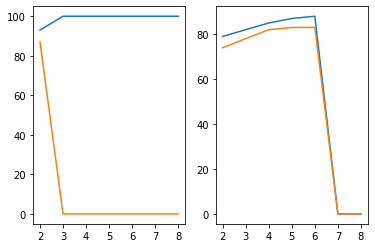

In [35]:
# 欠拟合，可以升维
import warnings
warnings.filterwarnings("ignore")

from sklearn.datasets import load_boston
boston = load_boston()
X = boston.data
y = boston.target

scalar = MinMaxScaler()
X = scalar.fit_transform(X)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=10)

models = [("LR",LinearRegression()),("SGD",SGDRegressor(max_iter=10000))]

degrees = range(2,9)

fig = plt.figure()

scores = {}

for model_name,model in models:
    scores[model_name+"train"] = []
    scores[model_name+"test"] = []
    for i in degrees:
        pf = PolynomialFeatures(degree=i)
        X_train_pf = pf.fit_transform(X_train)
        X_test_pf = pf.transform(X_test)
        model.fit(X_train_pf,y_train)
        train_score = round(model.score(X_train_pf,y_train),2)*100
        test_score = round(model.score(X_test_pf,y_test),2)*100
        scores[model_name+"train"].append(max(train_score,0))
        scores[model_name+"test"].append(max(test_score,0))
        print(f"{model_name}训练集得分{i}阶：",train_score)
        print(f"{model_name}测试集得分{i}阶：",test_score)


plt.subplot(121)
plt.plot(degrees,scores["LRtrain"])
plt.plot(degrees,scores["LRtest"])
plt.xticks(degrees)
plt.subplot(122)
plt.plot(degrees,scores["SGDtrain"])
plt.plot(degrees,scores["SGDtest"])
plt.xticks(degrees)


In [ ]:
# LR已经过拟合了

### 对高维模型添加L1、L2惩罚项，抑制过拟合
### Lasso（L1），Ridge（L2）

In [9]:
from sklearn.linear_model import Lasso,Ridge

import warnings
warnings.filterwarnings("ignore")

from sklearn.datasets import load_boston
boston = load_boston()
X = boston.data
y = boston.target

scalar = MinMaxScaler()
X = scalar.fit_transform(X)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=10)

models = [("LR",LinearRegression()),("SGD",SGDRegressor(max_iter=10000)),("Lasso",Lasso()),("Ridge",Ridge())]

for model_name,model in models:
    model.fit(X_train,y_train)
    print(f"{model_name}训练集得分：",round(model.score(X_train,y_train),2)*100)
    print(f"{model_name}测试集得分：",round(model.score(X_test,y_test),2)*100)
    print("-"*40)


LR训练集得分： 75.0
LR测试集得分： 67.0
----------------------------------------
SGD训练集得分： 73.0
SGD测试集得分： 66.0
----------------------------------------
Lasso训练集得分： 22.0
Lasso测试集得分： 9.0
----------------------------------------
Ridge训练集得分： 75.0
Ridge测试集得分： 67.0
----------------------------------------


LR训练集得分2阶： 93.0
LR测试集得分2阶： 87.0
LR训练集得分3阶： 100.0
LR测试集得分3阶： -27039.999999999996
LR训练集得分4阶： 100.0
LR测试集得分4阶： -774.0
LR训练集得分5阶： 100.0
LR测试集得分5阶： -376.0
SGD训练集得分2阶： 79.0
SGD测试集得分2阶： 74.0
SGD训练集得分3阶： 85.0
SGD测试集得分3阶： 82.0
SGD训练集得分4阶： 87.0
SGD测试集得分4阶： 84.0
SGD训练集得分5阶： 89.0
SGD测试集得分5阶： 84.0
Lasso训练集得分2阶： 91.0
Lasso测试集得分2阶： 87.0
Lasso训练集得分3阶： 94.0
Lasso测试集得分3阶： 88.0
Lasso训练集得分4阶： 95.0
Lasso测试集得分4阶： 88.0
Lasso训练集得分5阶： 95.0
Lasso测试集得分5阶： 88.0
Ridge训练集得分2阶： 83.0
Ridge测试集得分2阶： 79.0
Ridge训练集得分3阶： 89.0
Ridge测试集得分3阶： 85.0
Ridge训练集得分4阶： 91.0
Ridge测试集得分4阶： 87.0
Ridge训练集得分5阶： 93.0
Ridge测试集得分5阶： 87.0


<Figure size 432x288 with 0 Axes>

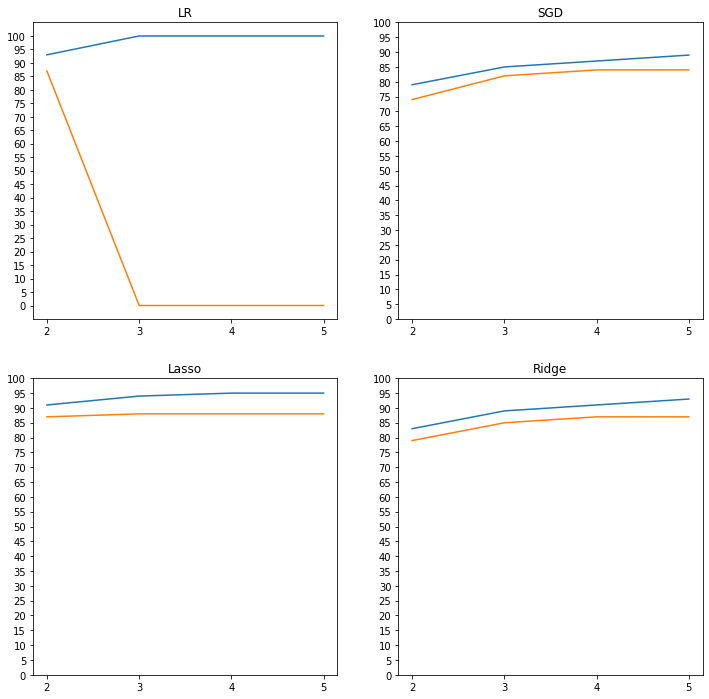

In [21]:
# 欠拟合，可以升维
import warnings
warnings.filterwarnings("ignore")

from sklearn.datasets import load_boston
boston = load_boston()
X = boston.data
y = boston.target

scalar = MinMaxScaler()
X = scalar.fit_transform(X)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=10)

models = [("LR",LinearRegression()),
          ("SGD",SGDRegressor(max_iter=10000)),
          ("Lasso",Lasso(alpha=1e-3)),  # alpha 惩罚系数，小于一减少抑制
          ("Ridge",Ridge(alpha=2))]    # alpha 惩罚系数，大于一加强抑制

degrees = range(2,6)

fig = plt.figure()

scores = {}

for model_name,model in models:
    scores[model_name+"train"] = []
    scores[model_name+"test"] = []
    for i in degrees:
        pf = PolynomialFeatures(degree=i)
        X_train_pf = pf.fit_transform(X_train)
        X_test_pf = pf.transform(X_test)
        model.fit(X_train_pf,y_train)
        train_score = round(model.score(X_train_pf,y_train),2)*100
        test_score = round(model.score(X_test_pf,y_test),2)*100
        scores[model_name+"train"].append(max(train_score,0))
        scores[model_name+"test"].append(max(test_score,0))
        print(f"{model_name}训练集得分{i}阶：",train_score)
        print(f"{model_name}测试集得分{i}阶：",test_score)

plt.figure(figsize=(12,12))
plt.subplot(221)
plt.plot(degrees,scores["LRtrain"])
plt.plot(degrees,scores["LRtest"])
plt.xticks(degrees)
plt.yticks(range(0,101,5))
plt.title("LR")
plt.subplot(222)
plt.plot(degrees,scores["SGDtrain"])
plt.plot(degrees,scores["SGDtest"])
plt.xticks(degrees)
plt.yticks(range(0,101,5))
plt.title("SGD")
plt.subplot(223)
plt.plot(degrees,scores["Lassotrain"])
plt.plot(degrees,scores["Lassotest"])
plt.xticks(degrees)
plt.yticks(range(0,101,5))
plt.title("Lasso")
plt.subplot(224)
plt.plot(degrees,scores["Ridgetrain"])
plt.plot(degrees,scores["Ridgetest"])
plt.xticks(degrees)
plt.yticks(range(0,101,5))
plt.title("Ridge")
plt.show()

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures,MinMaxScaler,StandardScaler
from sklearn.linear_model import LinearRegression,SGDRegressor,Ridge,Lasso
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

scalar = MinMaxScaler()
X = scalar.fit_transform(X)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=100)


models = [
 ("LR",LinearRegression()),
 ("SGD",SGDRegressor(max_iter=10000)),
 ("L2",Ridge(alpha=0.01)),
 ("L1",Lasso(alpha=0.001))
]


for model_name,model in models:
    print("#"*30)
    print(model_name.center(30))
    pf = PolynomialFeatures(degree=2)
    model.fit(pf.fit_transform(X_train),y_train)
    y_pred = model.predict(pf.transform(X_test))
    
    print("训练集评分：",round(model.score(pf.transform(X_train),y_train),2))
    print("测试集评分：",round(model.score(pf.transform(X_test),y_test),2),"误差：",round(mean_squared_error(y_test,y_pred)))
    print("#"*30)
    

##############################
              LR              
训练集评分： 0.93
测试集评分： 0.84 误差： 16
##############################
##############################
             SGD              
训练集评分： 0.78
测试集评分： 0.8 误差： 20
##############################
##############################
              L2              
训练集评分： 0.92
测试集评分： 0.88 误差： 12
##############################
##############################
              L1              
训练集评分： 0.92
测试集评分： 0.88 误差： 11
##############################


LR训练集得分2阶： 93.0
LR测试集得分2阶： 84.0
LR训练集得分3阶： 100.0
LR测试集得分3阶： -25658.999999999996
LR训练集得分4阶： 100.0
LR测试集得分4阶： -1127.0
LR训练集得分5阶： 100.0
LR测试集得分5阶： -590.0
SGD训练集得分2阶： 79.0
SGD测试集得分2阶： 80.0
SGD训练集得分3阶： 84.0
SGD测试集得分3阶： 86.0
SGD训练集得分4阶： 88.0
SGD测试集得分4阶： 89.0
SGD训练集得分5阶： 89.0
SGD测试集得分5阶： 89.0
Lasso训练集得分2阶： 92.0
Lasso测试集得分2阶： 88.0
Lasso训练集得分3阶： 94.0
Lasso测试集得分3阶： 90.0
Lasso训练集得分4阶： 94.0
Lasso测试集得分4阶： 89.0
Lasso训练集得分5阶： 95.0
Lasso测试集得分5阶： 89.0
Ridge训练集得分2阶： 83.0
Ridge测试集得分2阶： 84.0
Ridge训练集得分3阶： 88.0
Ridge测试集得分3阶： 88.0
Ridge训练集得分4阶： 91.0
Ridge测试集得分4阶： 90.0
Ridge训练集得分5阶： 92.0
Ridge测试集得分5阶： 90.0


<Figure size 432x288 with 0 Axes>

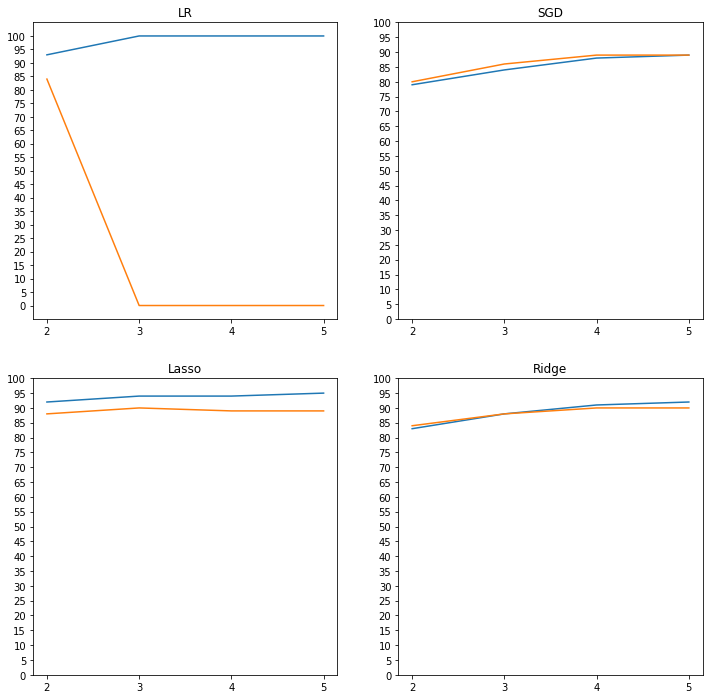

In [6]:
# 欠拟合，可以升维
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt

from sklearn.datasets import load_boston
boston = load_boston()
X = boston.data
y = boston.target

scalar = MinMaxScaler()
X = scalar.fit_transform(X)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=100)

models = [("LR",LinearRegression()),
          ("SGD",SGDRegressor(max_iter=10000)),
          ("Lasso",Lasso(alpha=1e-3)),  # alpha 惩罚系数，小于一减少抑制
          ("Ridge",Ridge(alpha=2))]    # alpha 惩罚系数，大于一加强抑制

degrees = range(2,6)

fig = plt.figure()

scores = {}

for model_name,model in models:
    scores[model_name+"train"] = []
    scores[model_name+"test"] = []
    for i in degrees:
        pf = PolynomialFeatures(degree=i)
        X_train_pf = pf.fit_transform(X_train)
        X_test_pf = pf.transform(X_test)
        model.fit(X_train_pf,y_train)
        train_score = round(model.score(X_train_pf,y_train),2)*100
        test_score = round(model.score(X_test_pf,y_test),2)*100
        scores[model_name+"train"].append(max(train_score,0))
        scores[model_name+"test"].append(max(test_score,0))
        print(f"{model_name}训练集得分{i}阶：",train_score)
        print(f"{model_name}测试集得分{i}阶：",test_score)

plt.figure(figsize=(12,12))
plt.subplot(221)
plt.plot(degrees,scores["LRtrain"])
plt.plot(degrees,scores["LRtest"])
plt.xticks(degrees)
plt.yticks(range(0,101,5))
plt.title("LR")
plt.subplot(222)
plt.plot(degrees,scores["SGDtrain"])
plt.plot(degrees,scores["SGDtest"])
plt.xticks(degrees)
plt.yticks(range(0,101,5))
plt.title("SGD")
plt.subplot(223)
plt.plot(degrees,scores["Lassotrain"])
plt.plot(degrees,scores["Lassotest"])
plt.xticks(degrees)
plt.yticks(range(0,101,5))
plt.title("Lasso")
plt.subplot(224)
plt.plot(degrees,scores["Ridgetrain"])
plt.plot(degrees,scores["Ridgetest"])
plt.xticks(degrees)
plt.yticks(range(0,101,5))
plt.title("Ridge")
plt.show()